In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error

In [286]:

df = pd.read_csv (r'../Datasets/BitcoinData.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"


In [287]:
def cleanData(df):
    cleanData = df

    repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', }
    cleanData['Vol.'] = cleanData['Vol.'].replace(repl_dict, regex=True).map(pd.eval).astype(float)

    cleanData['Price'] = cleanData['Price'].astype(str).str.replace(',', '').astype(float)
    cleanData['Open'] = cleanData['Open'].astype(str).str.replace(',', '').astype(float)
    cleanData['High'] = cleanData['High'].astype(str).str.replace(',', '').astype(float)
    cleanData['Low'] = cleanData['Low'].astype(str).str.replace(',', '').astype(float)
    cleanData['Change %'] = cleanData['Change %'].astype(str).str.replace('%', '').astype(float)
    cleanData['Date'] = pd.to_datetime(df['Date'])
#     cleanData['DayOfWeek'] = cleanData['Date'].dt.day_name()
    cleanData = cleanData.sort_values(by=['Date'])
    return cleanData

In [288]:
df = cleanData(df)

In [289]:
df

,Date,Price,Open,High,Low,Vol.,Change %
2284,2015-11-15,317.5,331.8,334.8,314.2,88320.0,-4.32
2283,2015-11-16,330.2,317.5,332.0,314.1,87140.0,4.02
2282,2015-11-17,333.9,330.2,342.9,328.1,98250.0,1.12
2281,2015-11-18,335.9,333.9,337.4,329.4,78360.0,0.60
2280,2015-11-19,325.0,335.9,335.6,323.4,86380.0,-3.26
...,...,...,...,...,...,...,...
4,2022-02-11,42388.4,43519.3,43915.1,42023.4,69950.0,-2.60
3,2022-02-12,42205.2,42388.4,43006.4,41776.8,37880.0,-0.43
2,2022-02-13,42061.1,42205.5,42725.1,41880.1,25880.0,-0.34
1,2022-02-14,42550.3,42061.1,42799.7,41591.3,53600.0,1.16


In [290]:
df.loc[0, 'Date'].day_name()

'Tuesday'

In [291]:
df['Date'].min()

Timestamp('2015-11-15 00:00:00')

In [292]:
df['Date'].max()

Timestamp('2022-02-15 00:00:00')

In [293]:
df['Date'].max() - timedelta(days=30)

Timestamp('2022-01-16 00:00:00')

In [294]:
filt = (df['Date'] >= '2020')
df.loc[filt]

,Date,Price,Open,High,Low,Vol.,Change %
776,2020-01-01,7199.8,7196.4,7259.4,7180.0,420280.0,0.05
775,2020-01-02,6967.0,7199.7,7209.6,6901.4,632780.0,-3.23
774,2020-01-03,7343.1,6967.1,7402.9,6884.1,936290.0,5.40
773,2020-01-04,7376.8,7345.1,7433.1,7291.4,523910.0,0.46
772,2020-01-05,7372.5,7376.8,7501.0,7345.6,628140.0,-0.06
...,...,...,...,...,...,...,...
4,2022-02-11,42388.4,43519.3,43915.1,42023.4,69950.0,-2.60
3,2022-02-12,42205.2,42388.4,43006.4,41776.8,37880.0,-0.43
2,2022-02-13,42061.1,42205.5,42725.1,41880.1,25880.0,-0.34
1,2022-02-14,42550.3,42061.1,42799.7,41591.3,53600.0,1.16


In [295]:
dfDate = df
dfDate = dfDate.set_index('Date')

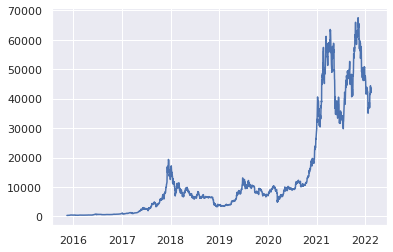

In [296]:
plt.plot(df['Date'], df['Price'])

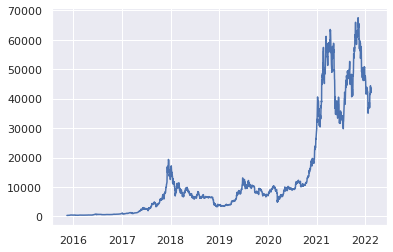

In [297]:
plt.plot(dfDate['Price'])

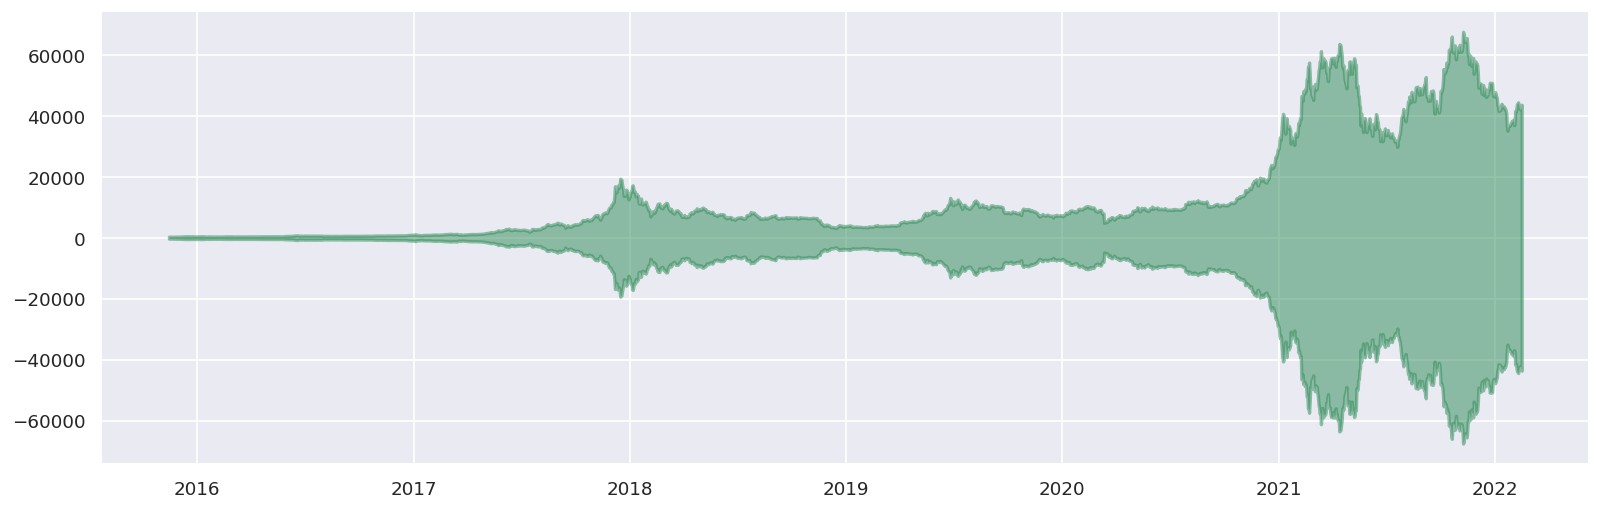

In [298]:
x = df['Date'].values
y1 = df['Price'].values

fig, ax = plt.subplots(1,1,figsize=(16,5),dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
# plt.ylim(-800,800)
plt.show()

In [299]:
reduced = dfDate['Price']

In [300]:
train = reduced[reduced.index < pd.to_datetime("2022-01-01", format='%Y-%m-%d')]
test = reduced[reduced.index > pd.to_datetime("2022-01-01", format='%Y-%m-%d')]



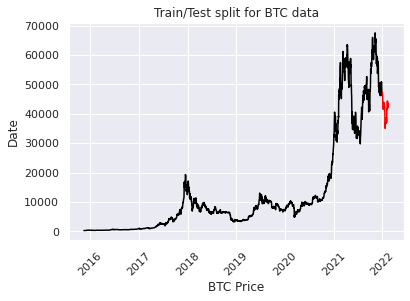

In [301]:
plt.plot(train, color='black')
plt.plot(test, color='red')
plt.title('Train/Test split for BTC data')
plt.xlabel('BTC Price')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()

In [302]:
train

Date
2015-11-15      317.5
2015-11-16      330.2
2015-11-17      333.9
2015-11-18      335.9
2015-11-19      325.0
               ...   
2021-12-27    50678.2
2021-12-28    47545.2
2021-12-29    46461.7
2021-12-30    47123.3
2021-12-31    46219.5
Name: Price, Length: 2239, dtype: float64

## Autoregressive Moving Average (ARMA)

In [303]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [304]:
ARMAmodel = SARIMAX(endog=train, order=(1,0,1))

/home/dawsboss/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dawsboss/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [305]:
ARMAmodel = ARMAmodel.fit()

/home/dawsboss/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45873D+02    |proj g|=  7.03109D+02

At iterate    5    f=  1.13562D+01    |proj g|=  5.68611D+00

At iterate   10    f=  8.44492D+00    |proj g|=  2.53007D-01

At iterate   15    f=  8.16826D+00    |proj g|=  1.60066D-02

At iterate   20    f=  8.14702D+00    |proj g|=  1.05483D-02

At iterate   25    f=  8.14516D+00    |proj g|=  1.65616D-03

At iterate   30    f=  8.14500D+00    |proj g|=  7.15019D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/dawsboss/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


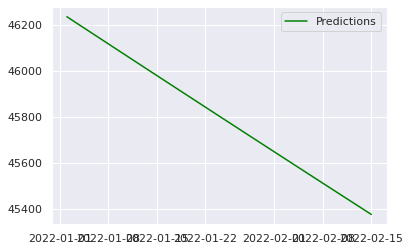

In [306]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out1 = y_pred_df["Predictions"] 

plt.plot(y_pred_out1, color='green', label = 'Predictions')
plt.legend()

In [307]:
arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  5480.217402698992


## Autoregressive Integrated Moving Average (ARIMA)

In [308]:
from statsmodels.tsa.arima.model import ARIMA

/home/dawsboss/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dawsboss/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dawsboss/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dawsboss/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


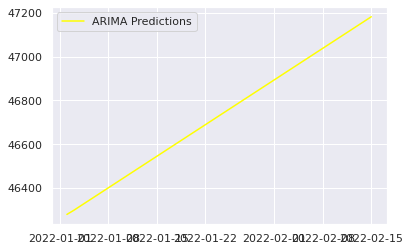

In [309]:
ARIMAmodel = ARIMA(train, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out2 = y_pred_df["Predictions"] 
plt.plot(y_pred_out2, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

In [310]:
arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  6339.063688215578


## Seasonal ARIMA (SARIMA)

/home/dawsboss/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dawsboss/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.66404D+00    |proj g|=  2.82566D-02


 This problem is unconstrained.



At iterate    5    f=  8.65707D+00    |proj g|=  1.18114D-02

At iterate   10    f=  8.64802D+00    |proj g|=  1.15377D-02

At iterate   15    f=  8.64194D+00    |proj g|=  2.08771D-03

At iterate   20    f=  8.64097D+00    |proj g|=  3.65235D-04

At iterate   25    f=  8.63995D+00    |proj g|=  6.79864D-03

At iterate   30    f=  8.63937D+00    |proj g|=  1.09698D-03

At iterate   35    f=  8.63696D+00    |proj g|=  4.27185D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     35     61      1     0     0   4.272D-03   8.637D+00
  F =   8.6369616965770000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/dawsboss/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


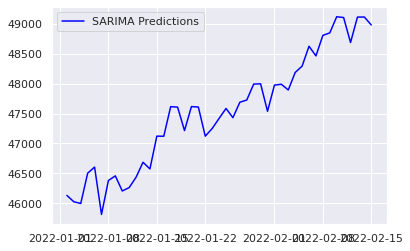

In [311]:
SARIMAXmodel = SARIMAX(train, order = (2, 2, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out3 = y_pred_df["Predictions"] 
plt.plot(y_pred_out3, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [312]:
arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  7145.507726499967


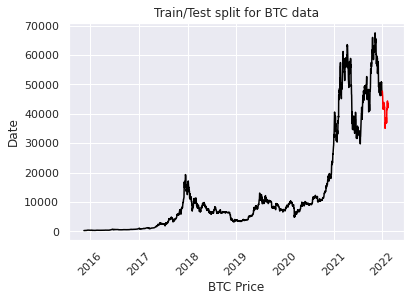

In [313]:
plt.plot(trainData['Price'], color='black')
plt.plot(testData['Price'], color='red')
plt.title('Train/Test split for BTC data')
plt.xlabel('BTC Price')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()

## Testing predictions vissually

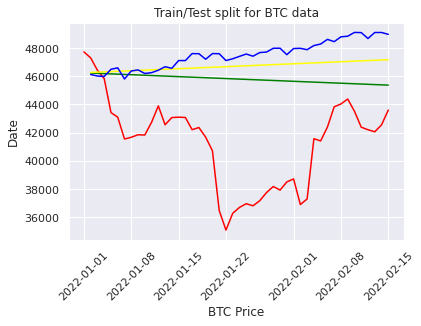

In [314]:
plt.plot(testData['Price'], color='red')
plt.plot(y_pred_out1, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out2, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out3, color='Blue', label = 'SARIMA Predictions')
plt.title('Train/Test split for BTC data')
plt.xlabel('BTC Price')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()

## VAR - Bad

/home/dawsboss/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


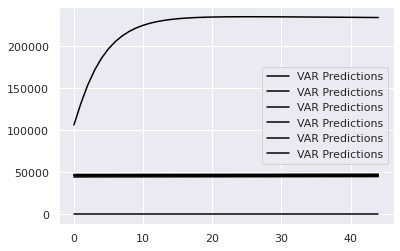

In [323]:
train = dfDate[dfDate.index < pd.to_datetime("2022-01-01", format='%Y-%m-%d')]
test = dfDate[dfDate.index > pd.to_datetime("2022-01-01", format='%Y-%m-%d')]

from statsmodels.tsa.vector_ar.var_model import VAR
VARmodel = VAR(train)#SARIMAX(train, order = (2, 2, 2), seasonal_order=(2,2,2,12))
VARmodel_fit = model4.fit()

y_pred = VARmodel_fit.forecast(VARmodel_fit.y, steps=len(test))

y_pred_out4 = y_pred
plt.plot(y_pred_out4, color='black', label = 'VAR Predictions')
plt.legend()